<a href="https://colab.research.google.com/github/Arya-Hari/fabric-classification-cnn/blob/main/model4_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp drive/MyDrive/my_utils.py .
import my_utils

In [3]:
#based of https://www.tensorflow.org/tutorials/load_data/images
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import re
import pathlib
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

path = "/content/drive/MyDrive/Fabrics_adjusted"

data_dir = pathlib.Path(path)

In [4]:
batch_size = 32
img_height = 400
img_width = 400

train_ds, val_ds, class_names = my_utils.generate_ds(data_dir, batch_size, img_height, img_width)

print(class_names)

Found 4714 files belonging to 6 classes.
Using 3772 files for training.
Found 4714 files belonging to 6 classes.
Using 942 files for validation.
['Cotton', 'Denim', 'Nylon', 'Polyester', 'Silk', 'Wool']


In [5]:
#data augmentation based of https://keras.io/examples/vision/image_classification_from_scratch/

#the augmentations to make
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(0.5)
    ]
)

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
#based of https://www.tensorflow.org/tutorials/load_data/images
num_classes = 6

norm = 0.0
dropout_val = 0.6

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, input_shape=(32, 400, 400, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(norm)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(norm)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(norm)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(norm)),
  tf.keras.layers.Dropout(dropout_val),
  tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(norm)),

  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

checkpoint = my_utils.generate_callback("/content/drive/MyDrive/", "Model-4a-Aug-fa")

hist = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 50,
    verbose = 1,
    callbacks = [checkpoint])

model.summary()

Epoch 1/50
118/118 [==============================] - ETA: 0s - loss: 1.4554 - accuracy: 0.4976 
Epoch 1: val_accuracy improved from -inf to 0.47346, saving model to /content/drive/MyDrive/Model-4a-Aug-fa.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


118/118 [==============================] - 1701s 14s/step - loss: 1.4554 - accuracy: 0.4976 - val_loss: 1.4717 - val_accuracy: 0.4735
Epoch 2/50
118/118 [==============================] - ETA: 0s - loss: 1.3731 - accuracy: 0.5231
Epoch 2: val_accuracy improved from 0.47346 to 0.53079, saving model to /content/drive/MyDrive/Model-4a-Aug-fa.h5
118/118 [==============================] - 24s 200ms/step - loss: 1.3731 - accuracy: 0.5231 - val_loss: 1.3292 - val_accuracy: 0.5308
Epoch 3/50
118/118 [==============================] - ETA: 0s - loss: 1.3000 - accuracy: 0.5437
Epoch 3: val_accuracy improved from 0.53079 to 0.56157, saving model to /content/drive/MyDrive/Model-4a-Aug-fa.h5
118/118 [==============================] - 25s 216ms/step - loss: 1.3000 - accuracy: 0.5437 - val_loss: 1.2564 - val_accuracy: 0.5616
Epoch 4/50
118/118 [==============================] - ETA: 0s - loss: 1.2699 - accuracy: 0.5559
Epoch 4: val_accuracy improved from 0.56157 to 0.57749, saving model to /content/d

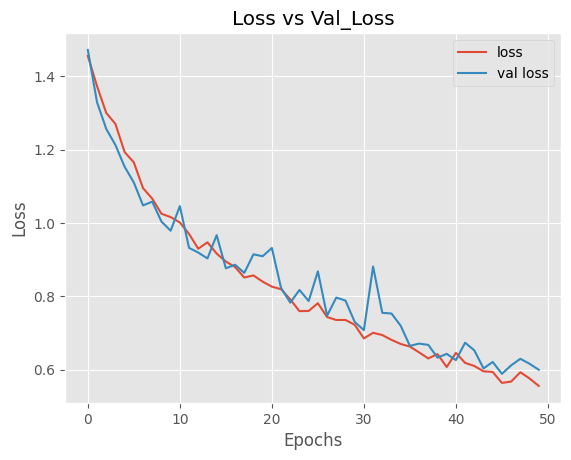

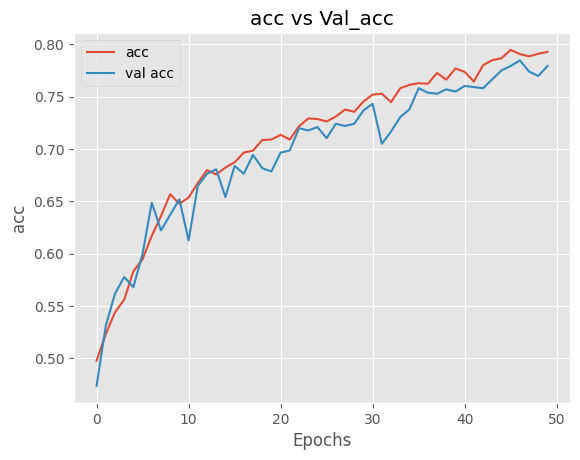

0

In [12]:
my_utils.generate_plot(hist)

In [20]:
img_path = "/content/drive/MyDrive/Fabrics_adjusted/dn2.jpg"

img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)



1/1 [==============================] - 0s 20ms/step
This image most likely belongs to Cotton with a 75.38 percent confidence.


In [21]:
img_path = "/content/drive/MyDrive/Fabrics_adjusted/images.jpeg"

img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 20ms/step
This image most likely belongs to Cotton with a 77.52 percent confidence.
